## IML_Projet_6
Classez des images à l'aide d'algorithmes de Deep Learning

Ce note book contient : 
- Exploration des données

## Installation libraries

In [1]:
#!pip install opencv-python && pip install opencv-contrib-python

!pip uninstall opencv-python -y
# downgrade OpenCV a bit since some none-free features are not available
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

Uninstalling opencv-python-3.4.7.28:
  Successfully uninstalled opencv-python-3.4.7.28
     |████████████████████████████████| 30.6MB 71kB/s 
     |████████████████████████████████| 20.0MB 120kB/s 
ERROR: tensor2tensor 1.14.1 requires opencv-python, which is not installed.
ERROR: stable-baselines 2.2.1 requires opencv-python, which is not installed.
ERROR: imgaug 0.2.9 requires opencv-python, which is not installed.
ERROR: dopamine-rl 1.0.5 requires opencv-python>=3.4.1.15, which is not installed.
ERROR: albumentations 0.1.12 requires opencv-python, which is not installed.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.17.3
    Uninstalling numpy-1.17.3:
      Successfully uninstalled numpy-1.17.3
  Found existing installation: opencv-contrib-python 3.4.3.18
    Uninsta

### Keras

In [0]:
# if necessary, switch to TensorFlow 2.0 before occial relase on google colab : 
# %tensorflow_version 2.x

## Data mount drive folder

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!ls

drive  sample_data


In [5]:
!pwd

/content


In [6]:
cd /content/drive/My Drive/OpenClassRooms/IML_Projet_6/code/DeepLearningPictureDogs

/content/drive/My Drive/OpenClassRooms/IML_Projet_6/code/DeepLearningPictureDogs


In [7]:
!ls

01_OC_IML_Project_6_explorations.ipynb	README.md


## Import

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
sns.set(color_codes=True, font_scale=1.33)

import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 25)

import scipy.io as sio

from PIL import Image
from PIL import ImageOps
from PIL import ImageFilter
import cv2 as cv

import tensorflow
print(tensorflow.__version__)

# keras from scratch
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
# keras already trained
from keras.applications.vgg16 import VGG16
# keras image preparation
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
# decode prediction
from keras.applications.vgg16 import decode_predictions

1.15.0


Using TensorFlow backend.


## Definitions

In [0]:
path_data = '/content/drive/My Drive/OpenClassRooms/IML_Projet_6/data/'
path_file_list = 'lists/file_list.mat'
path_test_list = 'lists/test_list.mat'
path_train_list = 'lists/train_list.mat'
path_test_data = 'test_data.mat'
path_train_data = 'train_data.mat'

path_images_races = ['Images/n02085620-Chihuahua/',
                     'Images/n02085782-Japanese_spaniel/',
                     'Images/n02085936-Maltese_dog/']

path_img_test = path_data + path_images_races[0] + "n02085620_1235.jpg"

## Loading

In [0]:
mat_contents = sio.loadmat(path_data + path_file_list)

In [11]:
mat_contents.keys()

dict_keys(['__header__', '__version__', '__globals__', 'file_list', 'annotation_list', 'labels'])

In [12]:
np.unique(mat_contents['labels']).shape

(120,)

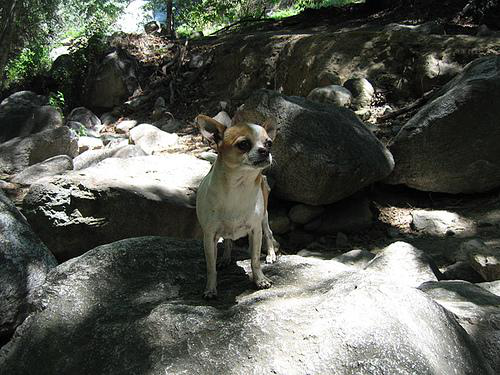

In [15]:
# test chargement image
# Charger l'image
img = Image.open(path_img_test) 


# Afficher l'image chargée
img

## Test image filters 

In [16]:
# Récupérer et afficher la taille de l'image (en pixels)
w, h = img.size
print("Largeur : {} px, hauteur : {} px".format(w, h))

Largeur : 500 px, hauteur : 375 px


In [17]:
# Afficher son mode de quantification
print("Format des pixels : {}".format(img.mode))

# Récupérer et afficher la valeur du pixel à une position précise
px_value = img.getpixel((20,100))
print("Valeur du pixel situé en (20,100) : {}".format(px_value))

Format des pixels : RGB
Valeur du pixel situé en (20,100) : (33, 37, 36)


In [18]:
# Récupérer les valeurs de tous les pixels sous forme d'une matrice
mat_img = np.array(img)
mat_img



array([[[40, 45, 38],
        [27, 32, 25],
        [32, 37, 30],
        ...,
        [25, 25, 25],
        [ 9,  9,  9],
        [ 4,  4,  4]],

       [[22, 27, 20],
        [22, 27, 20],
        [24, 29, 22],
        ...,
        [ 6,  6,  6],
        [ 0,  0,  0],
        [ 3,  3,  3]],

       [[24, 29, 22],
        [35, 40, 33],
        [32, 37, 30],
        ...,
        [ 7,  7,  7],
        [ 2,  2,  2],
        [ 4,  4,  4]],

       ...,

       [[28, 33, 29],
        [34, 39, 35],
        [21, 26, 22],
        ...,
        [28, 30, 27],
        [25, 27, 24],
        [27, 29, 26]],

       [[28, 33, 29],
        [31, 36, 32],
        [18, 23, 19],
        ...,
        [44, 46, 43],
        [41, 43, 40],
        [43, 45, 42]],

       [[26, 31, 27],
        [29, 34, 30],
        [17, 22, 18],
        ...,
        [44, 46, 41],
        [41, 43, 38],
        [42, 44, 39]]], dtype=uint8)

In [19]:
# Afficher la taille de la matrice de pixels
print("Taille de la matrice de pixels : {}".format(mat_img.shape))

Taille de la matrice de pixels : (375, 500, 3)


In [0]:
mat_img_r = mat_img[0:,0:,0]
mat_img_g = mat_img[0:,0:,1]
mat_img_b = mat_img[0:,0:,2]

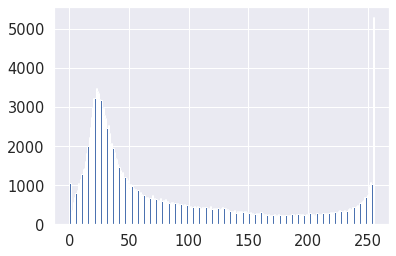

In [21]:
# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(mat_img_r.flatten(), bins=range(256))
plt.show()

In [0]:
img_autocontrast = ImageOps.autocontrast(img)

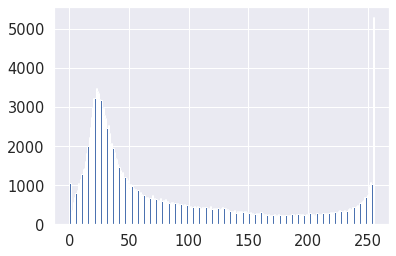

In [23]:
mat_img_autocontrast = np.array(img_autocontrast)
# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(mat_img_autocontrast[0:,0:,0].flatten(), bins=range(256))
plt.show()

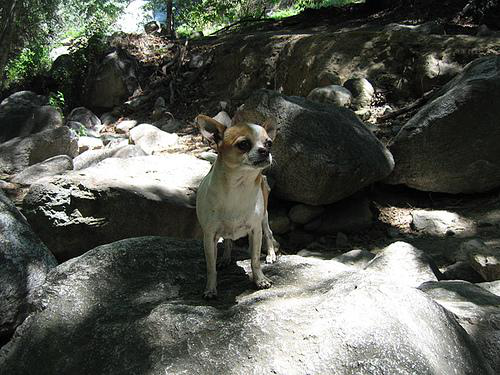

In [24]:
img_autocontrast

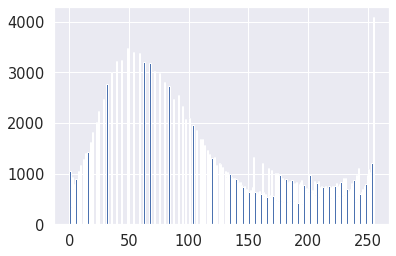

In [25]:

img_equalize = ImageOps.equalize(img)
mat_img_equalize = np.array(img_equalize)
# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(mat_img_equalize[0:,0:,0].flatten(), 
                            bins=range(256))
plt.show()

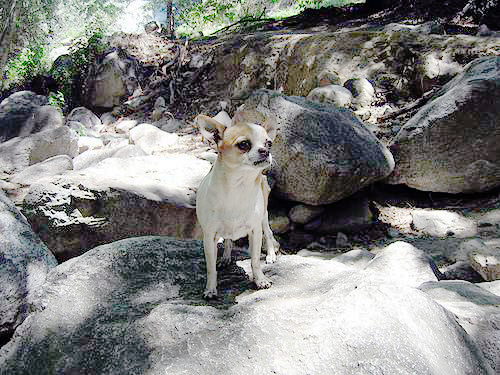

In [26]:
img_equalize

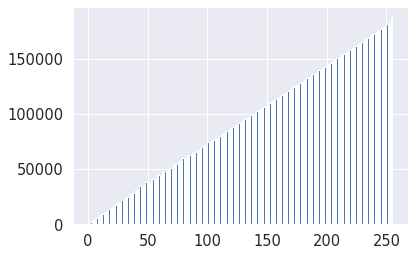

In [27]:
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(mat_img_equalize[0:,0:,0].flatten(), 
                            bins=range(256), cumulative=True)
plt.show()

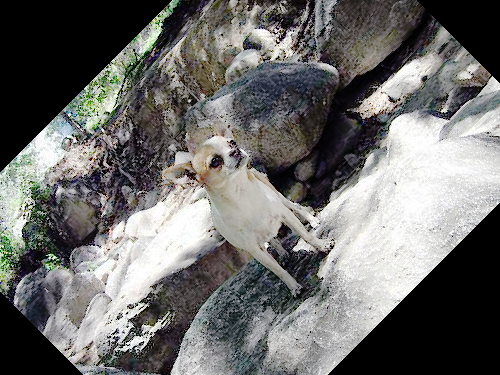

In [28]:
img_equalize.rotate(45, resample=0)

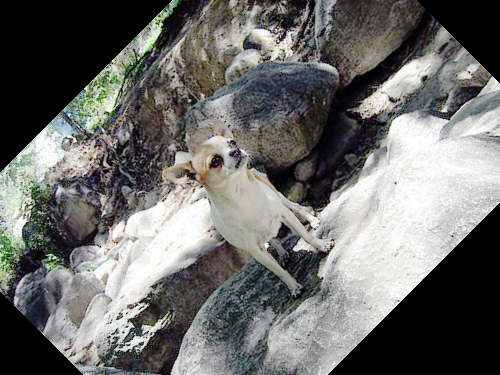

In [29]:
img_equalize.rotate(45, resample=Image.BILINEAR)

In [0]:
# Charger l'image sous forme d'une matrice de pixels
mat_img_equalize

# Générer le bruit gaussien de moyenne nulle et d'écart-type 7 (variance 49)
noise = np.random.normal(0, 7, mat_img_equalize[0:,0:,0].shape)
mat_img_equalize_noise = mat_img_equalize
mat_img_equalize_noise = mat_img_equalize_noise[0:,0:,0] + noise
# Créer l'image bruitée et l'afficher
noisy_img = Image.fromarray(mat_img_equalize_noise).convert('RGB')
noisy_img.show()

In [0]:
# Charger l'image sous forme d'une matrice de pixels
mat_img_equalize

# Générer le bruit gaussien de moyenne nulle et d'écart-type 7 (variance 49)
noise = np.random.normal(0, 7, mat_img_equalize[0:,0:,0].shape)
mat_img_equalize_noise = mat_img_equalize
mat_img_equalize_noise[0:,0:,0] = mat_img_equalize_noise[0:,0:,0] + noise
# Créer l'image bruitée et l'afficher
noisy_img = Image.fromarray(mat_img_equalize_noise).convert('RGB')
noisy_img.show()

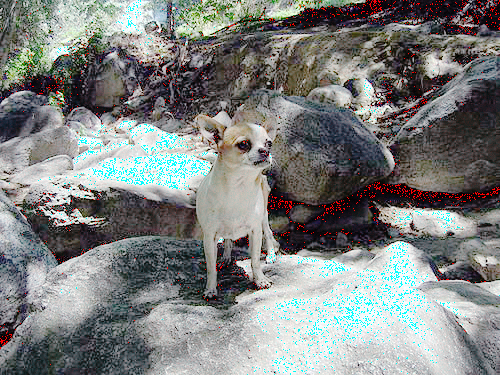

In [32]:
noisy_img

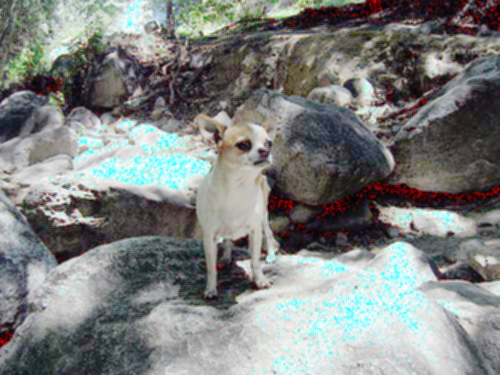

In [33]:
# Appliquer le lissage par moyennage (fenêtre de taille 9) et afficher le résultat
noisy_img_blurbox = noisy_img.filter(ImageFilter.BoxBlur(1))
noisy_img_blurbox

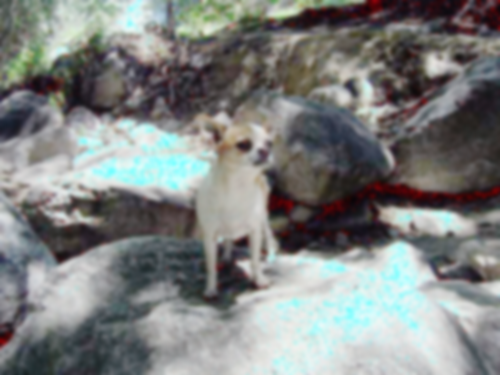

In [34]:
# GaussianBlur(radius)
noisy_img_GaussianBlur = noisy_img.filter(ImageFilter.GaussianBlur(2))
noisy_img_GaussianBlur

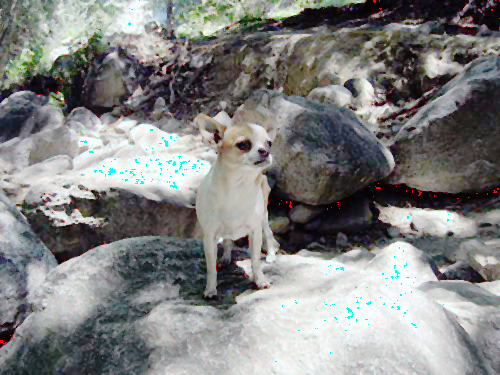

In [35]:
# MedianFilter
noisy_img_Median = noisy_img.filter(ImageFilter.MedianFilter(size=3))
noisy_img_Median

## Features Extraction  : SIFT

In [0]:
# decolorisation : gray
mat_img_gray = cv.cvtColor(np.array(img_equalize),cv.COLOR_BGR2GRAY)
sift = cv.xfeatures2d.SIFT_create()
kp = sift.detect(mat_img_gray, None)
mat_img_features = cv.drawKeypoints(mat_img_gray, kp, 
                                         np.array(img_equalize))
#cv.imwrite('sift_keypoints.jpg',img)

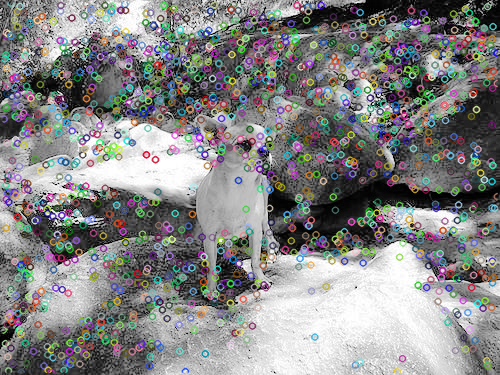

In [37]:
# Créer l'image et l'afficher
img_features = Image.fromarray(mat_img_features).convert('RGB')
img_features

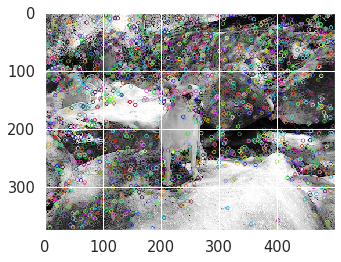

In [38]:
plt.figure()
plt.imshow(mat_img_features)
plt.show()

## Features Extraction  : SURF

In [39]:
# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 400
>>> surf = cv.xfeatures2d.SURF_create(400)
# Find keypoints and descriptors directly
>>> kp, des = surf.detectAndCompute(mat_img_gray, None)
>>> len(kp)

1692

In [40]:
# Check present Hessian threshold
print( surf.getHessianThreshold() )

400.0


In [41]:
# We set it to some 50000. Remember, it is just for representing in picture.
# In actual cases, it is better to have a value 300-500
surf.setHessianThreshold(12800)
# Again compute keypoints and check its number.
kp, des = surf.detectAndCompute(mat_img_gray, None)
print( len(kp) )

50


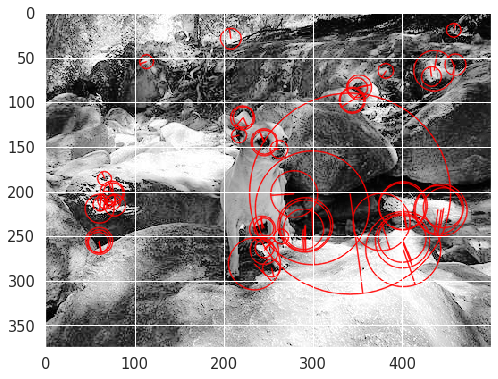

In [42]:
mat_img_gray_surf_feat = cv.drawKeypoints(mat_img_gray, kp, None, (255,0,0), 4)

fig = plt.figure(figsize=(8, 8))
plt.imshow(mat_img_gray_surf_feat)
plt.show()

## Descriptors from SURF
Finally we check the descriptor size and change it to 128 if it is only 64-dim.

In [43]:
# Find size of descriptor
print( surf.descriptorSize() )


64


In [44]:
# That means flag, "extended" is False.
surf.getExtended()

False

In [45]:
# So we make it to True to get 128-dim descriptors.
surf.setExtended(True)
kp, des = surf.detectAndCompute(mat_img_gray, None)
print( surf.descriptorSize() )

print( des.shape )


128
(50, 128)


## Keras Neural Network from scratch

Just the first part : Neural Network Structure before fitting process

In [46]:
my_VGG16 = Sequential()  # Création d'un réseau de neurones vide 

# Ajout de la première couche de convolution, suivie d'une couche ReLU
my_VGG16.add(Conv2D(64, (3, 3), input_shape=(224, 224, 3), padding='same', activation='relu'))

# Ajout de la deuxième couche de convolution, suivie  d'une couche ReLU
my_VGG16.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

# Ajout de la première couche de pooling
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

my_VGG16.add(Flatten())  # Conversion des matrices 3D en vecteur 1D

# Ajout de la première couche fully-connected, suivie d'une couche ReLU
my_VGG16.add(Dense(4096, activation='relu'))

# Ajout de la deuxième couche fully-connected, suivie d'une couche ReLU
my_VGG16.add(Dense(4096, activation='relu'))

# Ajout de la dernière couche fully-connected qui permet de classifier
my_VGG16.add(Dense(1000, activation='softmax'))

In [47]:
my_VGG16.compile(loss='mean_squared_error', optimizer='sgd')

## Kears : Use of VGG-16 pre-trained

Instance of neural network class

In [48]:
model = VGG16() # Création du modèle VGG-16 implementé par Keras

553467904/553467096 [==============================] - 8s 0us/step








Image preparation

In [0]:
img = load_img(path_data + path_images_races[0] + 'n02085620_242.jpg', 
               target_size=(224, 224))  # Charger l'image
img = img_to_array(img)  # Convertir en tableau numpy
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16

Prediction

In [0]:
y = model.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)

In [55]:
# Afficher les 3 classes les plus probables
print('Top 3 :', decode_predictions(y, top=3)[0])

Top 3 : [('n02085620', 'Chihuahua', 0.69509226), ('n02087046', 'toy_terrier', 0.29554692), ('n02113978', 'Mexican_hairless', 0.0036264244)]


## Transfer Learning with Keras